In [6]:
# Set matplotlib inline to view images below the cell in this notebook
%matplotlib inline

# To prettify python code (python syntax is already pretty of course ;) ) --> https://pypi.org/project/nb-black/
%load_ext lab_black

<IPython.core.display.Javascript object>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<IPython.core.display.Javascript object>

In [8]:
!ls ../../..

code			  sub-blnd05  sub-blnd17  sub-ctrl12
dataset_description.json  sub-blnd06  sub-ctrl01  sub-ctrl13
derivatives		  sub-blnd07  sub-ctrl02  sub-ctrl14
inputs			  sub-blnd08  sub-ctrl03  sub-ctrl15
Makefile		  sub-blnd09  sub-ctrl04  sub-ctrl16
participants.json	  sub-blnd10  sub-ctrl05  sub-ctrl17
participants.tsv	  sub-blnd11  sub-ctrl06  sub-ctrl18
README			  sub-blnd12  sub-ctrl07  task-olfid_events.json
sub-blnd01		  sub-blnd13  sub-ctrl08  task-olfloc_events.json
sub-blnd02		  sub-blnd14  sub-ctrl09
sub-blnd03		  sub-blnd15  sub-ctrl10
sub-blnd04		  sub-blnd16  sub-ctrl11


<IPython.core.display.Javascript object>

In [9]:
input_file = "../../../participants.tsv"

<IPython.core.display.Javascript object>

In [10]:
df = pd.read_csv(input_file, sep="\t")
df.head()

,participant_id,Group,Sex,Age,Handedness,DK_C1_Letter_Fluency,DK_C2_Category_Fluency,DK_C3_Category_SwitchingTC,DK_C3_Category_SwitchingACC,TEA_C2,...,SS_OM_O11,SS_OM_O12,SS_OM_O13,SS_OM_O14,SS_OM_O15,SS_OM_O16,IRM_Pleasantness_Eucalyptus,IRM_Pleasantness_Almond,IRM_Intensity_Eucalyptus,IRM_Intensity_Almond
0,sub-blnd01,blind,1,66,30,68.0,49.0,16.0,15.0,7,...,5,5,1,5,5,5,3,7,3,3
1,sub-blnd02,blind,1,28,12,46.0,34.0,16.0,15.0,7,...,5,4,3,4,5,5,6,7,4,3
2,sub-blnd03,blind,0,61,28,46.0,32.0,9.0,8.0,7,...,3,2,4,5,3,1,6,5,5,3
3,sub-blnd04,blind,1,26,14,51.0,48.0,17.0,16.0,7,...,3,3,4,5,5,5,4,6,5,2
4,sub-blnd05,blind,1,69,22,20.0,30.0,12.0,11.0,7,...,5,3,3,2,3,4,6,7,3,3


<IPython.core.display.Javascript object>

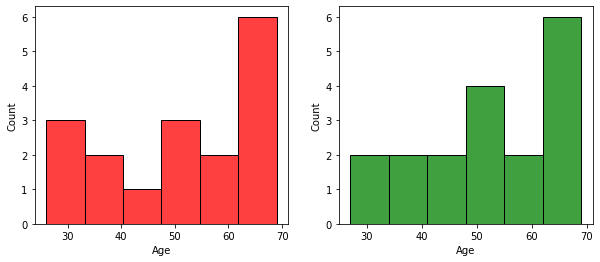

<IPython.core.display.Javascript object>

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.histplot(df["Age"][df["Group"] == "blind"], ax=ax[0], color="red")
sns.histplot(df["Age"][df["Group"] == "control"], ax=ax[1], color="green")
plt.show()

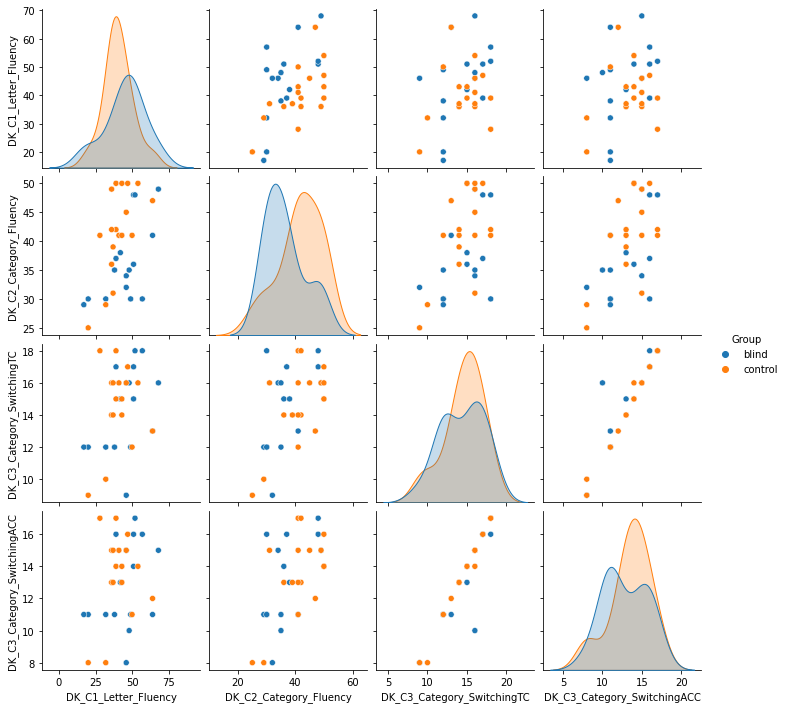

<IPython.core.display.Javascript object>

In [35]:
headers = list(df.columns)
columns_to_include = [x for x in headers if "DK_" in x]
columns_to_include.append("Group")
sns.pairplot(df[columns_to_include], diag_kind="kde", hue="Group")

In [40]:
headers = list(df.columns)
columns_to_include = [x for x in headers if "SS_Pls" in x]

<IPython.core.display.Javascript object>

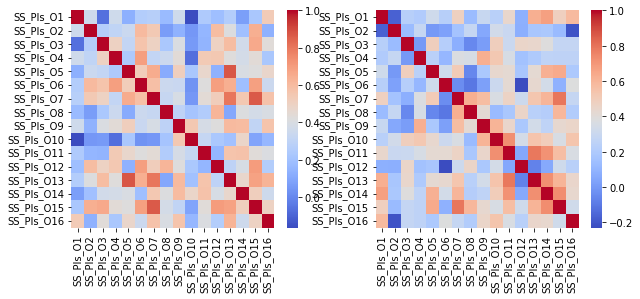

<IPython.core.display.Javascript object>

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.heatmap(
    df[columns_to_include][df["Group"] == "blind"].corr(),
    annot=False,
    cmap="coolwarm",
    ax=ax[0],
)
sns.heatmap(
    df[columns_to_include][df["Group"] == "control"].corr(),
    annot=False,
    cmap="coolwarm",
    ax=ax[1],
)
plt.show()

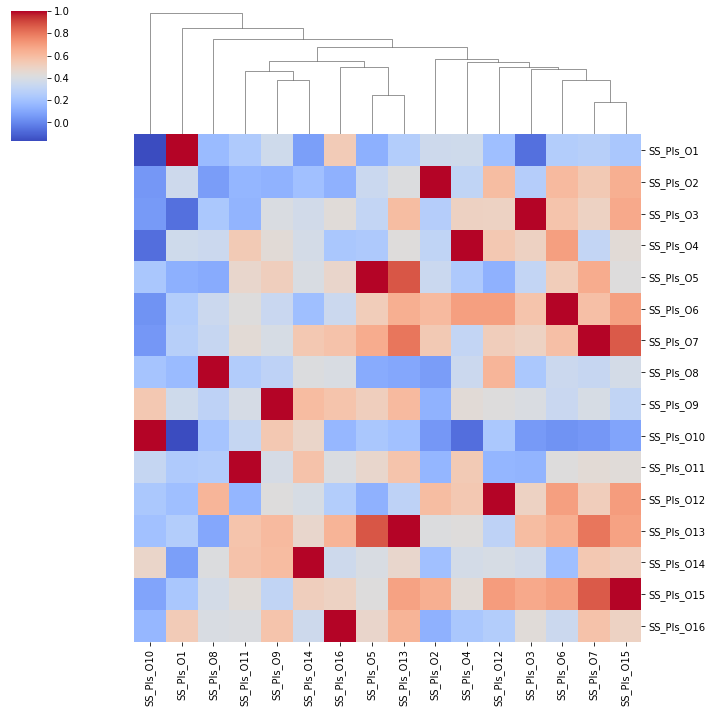

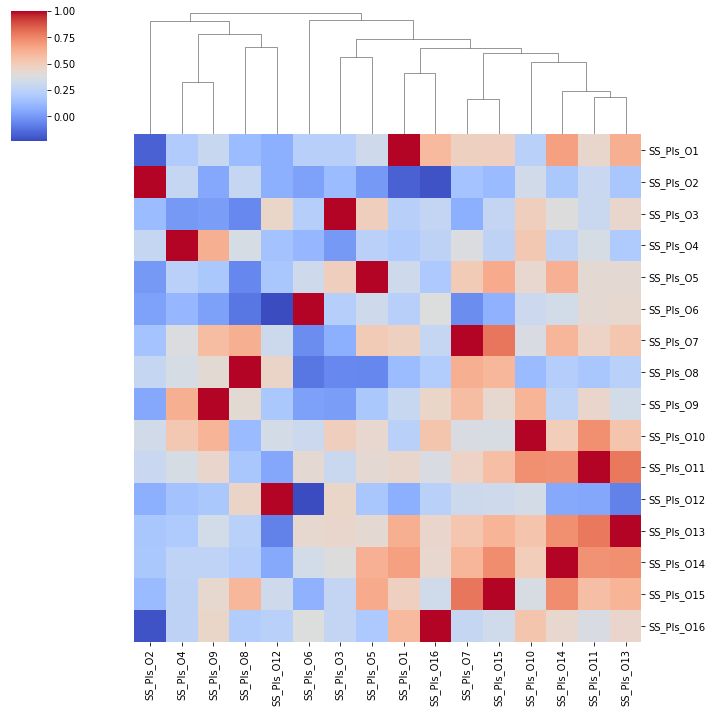

<IPython.core.display.Javascript object>

In [56]:
sns.clustermap(
    df[columns_to_include][df["Group"] == "blind"].corr(),
    cmap="coolwarm",
    row_cluster=False,
)
sns.clustermap(
    df[columns_to_include][df["Group"] == "control"].corr(),
    cmap="coolwarm",
    row_cluster=False,
)